In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
RANDOM_SEED = 42

In [5]:
train_df = pd.read_csv('dataset/train.csv')

In [6]:
train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


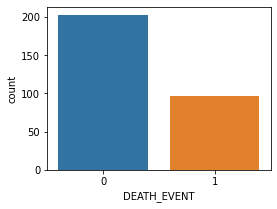

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(train_df['DEATH_EVENT'])

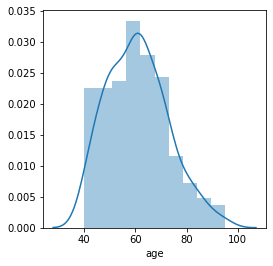

In [12]:
plt.figure(figsize=(4,4))
sns.distplot(train_df['age'])

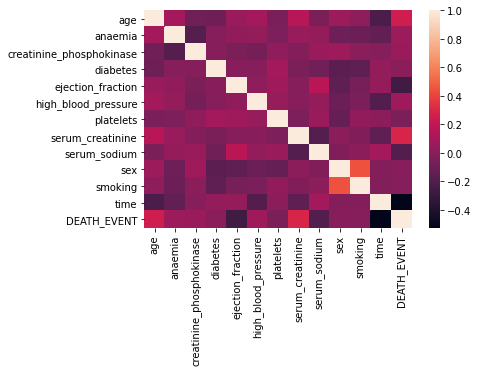

In [13]:
sns.heatmap(train_df.corr())

In [14]:
train_df.drop('time',axis=1,inplace=True)

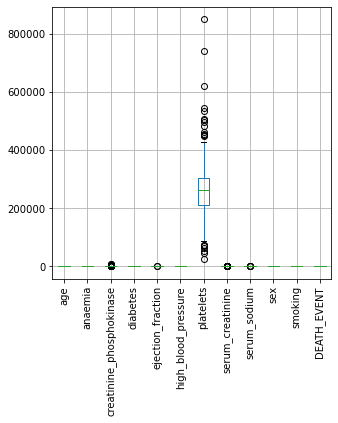

In [25]:
train_df.boxplot(figsize=(5,5),rot=90)

In [15]:
x = train_df.drop('DEATH_EVENT',axis=1)
y = train_df.DEATH_EVENT

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=RANDOM_SEED)

In [18]:
from sklearn.preprocessing import RobustScaler

In [23]:
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_val = rs.transform(x_val)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred_dt = dt.predict(x_val)

In [29]:
from sklearn.metrics import accuracy_score,classification_report

In [102]:
score_dt = accuracy_score(y_pred_dt,y_val)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred_rf = rf.predict(x_val)

In [103]:
score_rf = accuracy_score(y_pred_rf,y_val)

In [38]:
from sklearn.neighbors import KNeighborsClassifier 

In [40]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred_kn = kn.predict(x_val)

In [104]:
score_kn = accuracy_score(y_pred_kn,y_val)

In [43]:
from sklearn.svm import SVR

In [88]:
svr =SVR(gamma='auto',kernel='rbf',C=3)
svr.fit(x_train,y_train)

SVR(C=3, gamma='auto')

In [89]:
y_pred_svr = svr.predict(x_val)
y_pred_svr = np.round(y_pred_svr)

In [105]:
score_svr = accuracy_score(y_pred_svr,y_val)

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [94]:
y_pred_gb =gb.predict(x_val)

In [106]:
score_gb = accuracy_score(y_pred_gb,y_val)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [100]:
y_pred_log = log.predict(x_val)

In [107]:
score_log = accuracy_score(y_pred_log,y_val)

In [109]:
print(f"The Accuracy of Decision Tree Model is: {score_dt}")
print(f"The Accuracy of Random Forest Model is: {score_rf}")
print(f"The Accuracy of KNeighbors Classifier Model is: {score_kn}")
print(f"The Accuracy of Support Vector Machine Model is: {score_svr}")
print(f"The Accuracy of Gradient Boosting Classifier Model is: {score_gb}")
print(f"The Accuracy of Logistic Regression Model is: {score_log}")

The Accuracy of Decision Tree Model is: 0.7166666666666667
The Accuracy of Random Forest Model is: 0.65
The Accuracy of KNeighbors Classifier Model is: 0.6166666666666667
The Accuracy of Support Vector Machine Model is: 0.7
The Accuracy of Gradient Boosting Classifier Model is: 0.7
The Accuracy of Logistic Regression Model is: 0.6333333333333333
